<a href="https://colab.research.google.com/github/cmoore102589/ai-data-science-portfolio/blob/main/Lab_01_MMoore25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 1

**Matthew Corley Moore**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [notebook renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the two cells below to install and import the necessary tools for this assignment.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import rltools.gym as gym
import rltools
from rltools.utils import RandomAgent, DictAgent, FnAgent, evaluate, create_gif

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rule can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Frozen Lake (4x4)

In Part 1 of this assignment, you will explore the Frozen Lake environment. You will be asked to evaluate the performance of two agents: one that selects actions at random, and one that follows a custom policy that you will define.

## 1.A - Create Environment

In the cell below, create an instance of the `'FrozenLake-v1'` environment with `prob=0.8`. Then use `matplotlib` to display the environment (without axes).

Starting State: 0


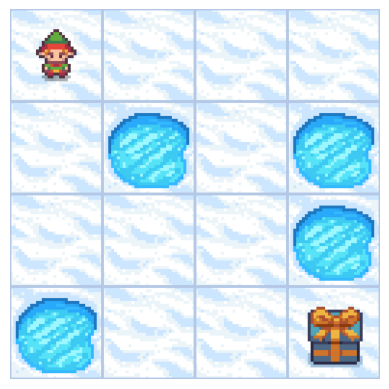

In [ ]:
env = gym.make(
    name = 'FrozenLake-v1',
    prob = 0.8,
    rew_struct = [-1, -10, 100],
    render_mode = 'rgb_array'
)


state, info = env.reset()
print(f'Starting State: {state}')
plt.imshow(env.render())
plt.axis('off')
plt.show()

## 1.B - Evaluate Random Agent

Complete the following steps in the cell below:
1. Create an instance of `RandomAgent` for the environment created in Step 1.A.
2. Evaluate the random agent's performance using the `evaluate()` function. Use 1000 episodes for evaluation, with `gamma=1.0`. Set `seed=1` and `check_success=True`.



In [ ]:
random_agent = RandomAgent(env)

results = evaluate(env, random_agent, gamma=1.0, episodes=1000, seed=1, check_success=True)

Mean Return:    -15.945
StdDev Return:  10.0745
Mean Length:    7.715
StdDev Length:  5.7834
Success Rate:   0.007


## 1.C - Create Policy

You will now attempt to find an effective (though not necessarily optimal) policy for this Frozen Lake environment. **Your goal will be to find a policy that leads to a success rate of at least 0.7.**

Define your policy by completing the dictionary below, specifying an action (0, 1, 2, or 3) to be taken from each of the 16 states. Note that the action taken from a state representing a hole or the goal is unimportant, since actions will never be taken from these states.

After defining your policy, display it by passing it to the `display_policy()` method of the environment.

In [ ]:
my_policy = {
    0:0, 1:2, 2:1, 3:0,
    4:1, 5:0, 6:1, 7:0,
    8:2, 9:1, 10:1, 11:0,
    12:0, 13:2, 14:2, 15:3
}

env.display_policy(my_policy)

+---+---+---+---+
| S | → | ↓ | ← |
+---+---+---+---+
| ↓ | H | ↓ | H |
+---+---+---+---+
| → | ↓ | ↓ | H |
+---+---+---+---+
| H | → | → | G |
+---+---+---+---+



## 1.D - Evaluate Custom Policy

Complete the following steps in the cell below:
1. Create an instance of `DictAgent` for the environment created in Step 1.A and using your custom policy.
2. Evaluate the agent's performance using the `evaluate()` function. Use 1000 epsides for evaluation, with `gamma=1.0`. Set `seed=1` and `check_success=True`.


**Note: If your agent's success rate is not at least 0.7, then update your policy in Step 1.C and try again.**


In [ ]:
right_agent = DictAgent(env, my_policy)
eval_results = evaluate(env, right_agent, gamma=1.0, episodes=1000, check_success=True, max_steps=100, seed=1)

Mean Return:    56.633
StdDev Return:  47.7592
Mean Length:    15.217
StdDev Length:  9.8251
Success Rate:   0.735


## 1.E - Animate Episodes

Use the following two cells to create two gifs demonstrating your agent's behavior. The gifs should be saved to a folder named `'gifs'` and should themselves be named `'frozen_lake_01'` and `'frozen_lake_02'`. Select two different seeds for the episodes shown in the gifs. The first gif should demonstrate a successful attempt and the second gif should demonstrate a failed attempt.

21 steps completed.
Cumulative reward: 80
Success


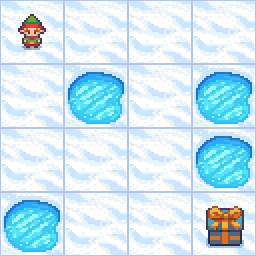

In [ ]:
create_gif(env, right_agent, max_steps=100, folder='gifs', seed=2, filename='frozen_lake_01')

23 steps completed.
Cumulative reward: 78
Success


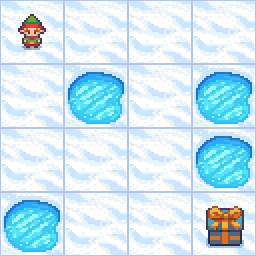

In [ ]:
create_gif(env, right_agent, max_steps=100, folder='gifs', seed=3, filename='frozen_lake_02')

# Part 2 - Taxi Environment

In Part 2 of this assignment, you will explore the Taxi environment. You will be asked to find a solution to one instance of the environment and also to explore the performance of an agent that acts randomly.

## 2.A - Create Environment

In the cell below, create an instance of the `'Taxi-v3'`. Reset the environment, setting `seed=15`. Then use `matplotlib` to display the environment (without axes).

Starting State: 344


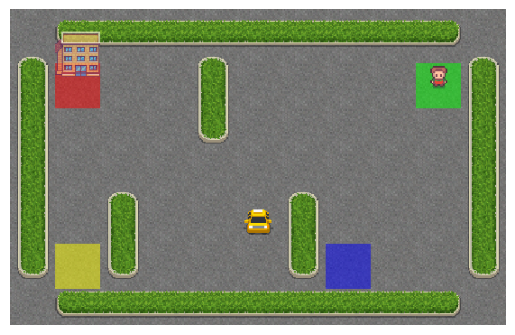

In [ ]:
env1 = gym.make('Taxi-v3', render_mode = 'rgb_array')

state, info = env1.reset(seed=15)
print(f'Starting State: {state}')
plt.imshow(env1.render())
plt.axis('off')
plt.show()

## 2.B - Find Solution

You will now attempt to find a solution to the version of the environment assocated with a seed of 15, as displayed in Step 2.A. To create your solution, complete the steps below:

1. Create a list containing a sequence of integers, with each integer selected from the range 0 - 5 (inclusive). This list will represent a sequence of actions to be taken in your solution. You might wish to build this list step by step as your develop your solution. **Your solution should be as short as possible.**

2. Reset the environment.

3. Loop over the list of actions. With each iteration of the loop, apply the appropriate action and then print a message as shown below, with the blanks replaced with the approprate values. Use f-strings to align the components of the output.

    * `Action taken: ____, New state: ____, Reward: ____, Done: ____`

4. Use matplotlib to display the final state of your environment (without axes).

Old State: 344, Action: 1, New State: 244, Reward:  -1, Done: False
Old State: 244, Action: 2, New State: 264, Reward:  -1, Done: False
Old State: 264, Action: 2, New State: 284, Reward:  -1, Done: False
Old State: 284, Action: 1, New State: 184, Reward:  -1, Done: False
Old State: 184, Action: 1, New State:  84, Reward:  -1, Done: False
Old State:  84, Action: 3, New State:  64, Reward:  -1, Done: False
Old State:  64, Action: 3, New State:  44, Reward:  -1, Done: False
Old State:  44, Action: 0, New State: 144, Reward:  -1, Done: False
Old State: 144, Action: 0, New State: 244, Reward:  -1, Done: False
Old State: 244, Action: 3, New State: 224, Reward:  -1, Done: False
Old State: 224, Action: 3, New State: 204, Reward:  -1, Done: False
Old State: 204, Action: 1, New State: 104, Reward:  -1, Done: False
Old State: 104, Action: 1, New State:   4, Reward:  -1, Done: False


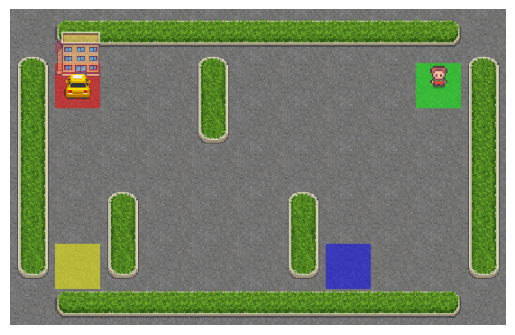

In [ ]:
actions = [1,2,2,1,1,3,3,0,0,3,3,1,1]

state, info = env1.reset(seed=15)

for a in actions:
    old_state = state
    state, reward, done, truncated, info = env1.step(a)

    print(f'Old State: {old_state:>3}, Action: {a:>1}, New State: {state:>3}, Reward: {reward:>3}, Done: {done}')
plt.imshow(env1.render())
plt.axis('off')
plt.show()

## 2.C - Animate Solution

Run the cell below as-is to animate your proposed solution.

13 steps completed.
Cumulative reward: -13
Ongoing


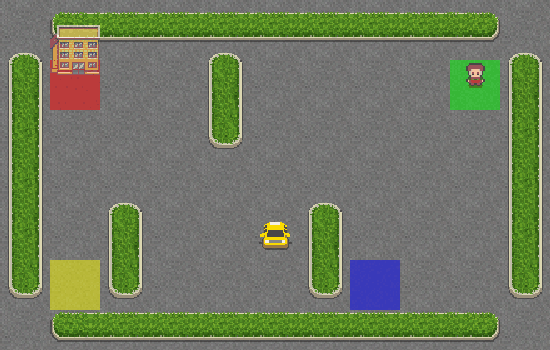

In [ ]:
create_gif(env1, agent=None, actions=actions, seed=15, folder='gifs', filename='taxi_soln')

## 2.D - Evaluate Random Agent

In theory, an agent acting randomly in the Taxi environment will eventually find a solution, but it might take an exceptionally long time for it to do so. We will explore this fact in this step.

Perform the following steps in the cell below:
1. Create an instance of `RandomAgent` for the environment created in Step 2.A.
2. Evaluate the random agent's performance using the `evaluate()` function. Use 500 episodes for evaluation, with `gamma=1.0`. Set `seed=1`, `max_steps=None`, and `check_success=True`.



In [ ]:
random_agent1 = RandomAgent(env1)

eval_results1 = evaluate(env1, random_agent1, gamma=1.0, episodes=500, check_success=True, max_steps=100, seed=1)

Mean Return:    -390.308
StdDev Return:  48.5956
Mean Length:    99.47
StdDev Length:  4.5792
Success Rate:   0.014


# Part 3 - Cart Pole

In Part 3 of this assignment, you will explore the Cart Pole environment. You will be asked to define and evaluate two policies for this environment. Since this environmnet has a continuous state space, we cannot represent policies for the environment as a dictionary. We will instead use functions to represent policies.

## 3.A - Create Environment

In the cell below, create an instance of the 'CartPole-v1'. Reset the environment setting `seed=42` and print the initial state. Then use matplotlib to display the environment (without axes).

Starting State: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]


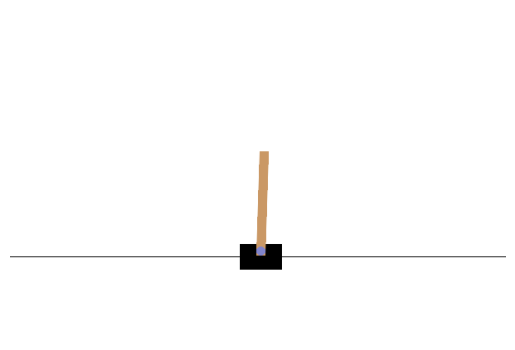

In [ ]:
env2 = gym.make('CartPole-v1', render_mode='rgb_array')

state, info = env2.reset(seed=42)
print(f'Starting State: {state}')
plt.imshow(env2.render())
plt.axis('off')
plt.show()

## 3.B - Performance of Random Agent

Create an instance of `RandomAgent` for the environment created in Step 3.A. Then use `evaluate()` to evaluate the random agent, using 1000 episodes and setting `gamma=1.0` and `seed=1`.

In [ ]:
random_agent2 = RandomAgent(env2)

eval_results2 = evaluate(env2, random_agent2, gamma=1.0, episodes=1000, seed=1)

Mean Return:    46.891
StdDev Return:  15.0174
Mean Length:    47.891
StdDev Length:  15.0174


## 3.C - Episode Generated by Random Agent

Use `create_gif()` to animate an episode generated by the random agent. Set `seed=1` and name the gif `cartpole_1`. Do not change the value of `max_steps` from the default of 1000.


61 steps completed.
Cumulative reward: 60.0


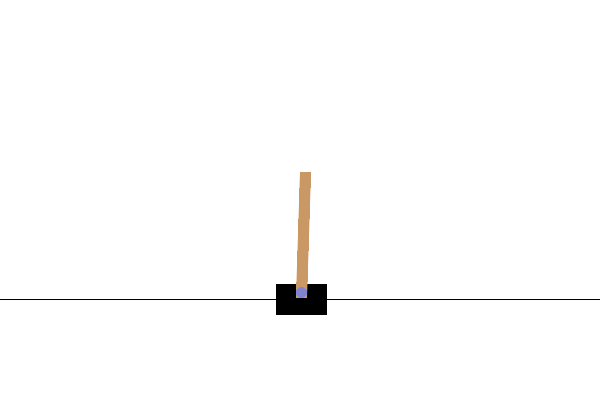

In [ ]:
create_gif(env2, random_agent2, max_steps=1000, folder='gifs', filename='cartpole_1')

## 3.D - Performance Under Policy A

We will now create and evaluate a very basic policy. This policy will simply move left if the pole is leaning to the left and will move right if the pole is leaning to the right. Recall that the angle of pole is stored in the 3rd element of the state array (that is, the element at index 2). If the angle is negative, then the pole is leaning to the left, and if the angle is positive, then the pole is leaning to the right.

Start by completing the function `policy_a()`. This function should return an action of 0 or 1 based on the current angle of the pole, as described in the paragraph above.

After completing the function, fill in the blanks in the cell to evaluate the performance of an `FnAgent` agent following the policy defined by the function `policy_a()`. Do not change the value of `max_steps` from the default of 1000.


In [ ]:
def policy_a(state):
    # Complete the function
    return 0 if state[2] < 0 else 1

agent= FnAgent(policy_a)
results = evaluate(env2, agent, gamma=1.0, episodes=1000, seed=1)

Mean Return:    158.312
StdDev Return:  28.1448
Mean Length:    159.312
StdDev Length:  28.1448


## 3.E - Episode Generated by Policy A

Use `create_gif()` to animate an episode generated by the agent following Policy A. Set `seed=1` and name the gif `cartpole_2`.


124 steps completed.
Cumulative reward: 123.0


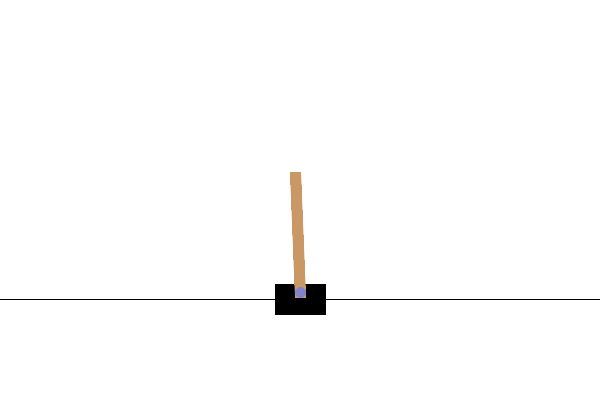

In [ ]:
create_gif(env2, agent, max_steps=1000, folder='gifs', filename='cartpole_2', seed = 1)

## 3.F - Performance Under Policy B

We will now create and evaluate a more complicated policy. Under this policy, the agent will move in the direction the pole is leaning if the angle is sufficiently large. If the angle of the pole is small, then the agent will move opposite the direction in which the pole is currently swinging toward. The decision between te two behaviors will be determined by a threshold value `K`.


After completing the function, fill in the blanks in the cell to evaluate the performance of an `FnAgent` agent following the policy defined by the function `policy_b()`. Do not change the value of `max_steps` from the default of 1000.

**Adjust the threshold value `K` until the mean episode length is greater than 900.**

In [ ]:
def policy_b(state):
    K = 0.03457658
    # Complete the function
    if state[2] < -K: return 0
    if state[2] > K: return 1
    if state[3] > 0: return 1
    if state[3] <= 0: return 0

agent2= FnAgent(policy_b)

results = evaluate(env2, agent2, gamma=1.0, max_steps=1000, episodes=100, seed=1)

Mean Return:    948.7
StdDev Return:  127.3573
Mean Length:    948.92
StdDev Length:  127.0434


## 3.G - Episode Generated by Policy B

Use `create_gif()` to animate an episode generated by the agent following Policy B. Set `seed=1` and name the gif `cartpole_3`. Do not change the value of `max_steps` from the default of 1000.


100 steps completed.
Cumulative reward: 100.0


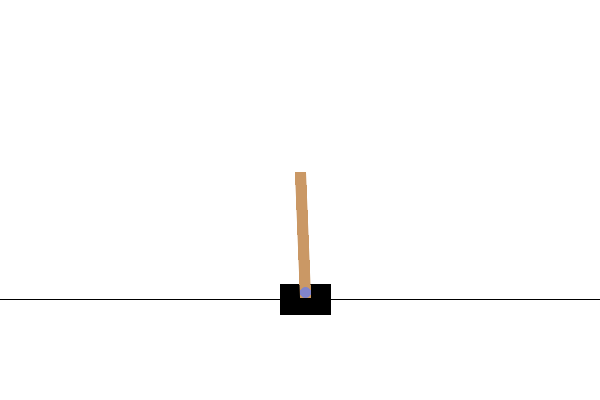

In [ ]:
create_gif(env2, agent2, max_steps=100, folder='gifs', filename='cartpole_3')

# Submission Instructions

1. Perform a Restart and Run All by clicking **Tools > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
